<a href="https://colab.research.google.com/github/uvaishnav/ANN-practise/blob/main/Peach_pant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plant_directory='/content/drive/MyDrive/Peach Crop plant Village DS'

datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')

])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
34/34 [==============================] - 44s 642ms/step - loss: 0.3748 - accuracy: 0.8678 - val_loss: 0.1236 - val_accuracy: 0.9661
Epoch 2/10
34/34 [==============================] - 11s 306ms/step - loss: 0.1348 - accuracy: 0.9440 - val_loss: 0.0627 - val_accuracy: 0.9718
Epoch 3/10
34/34 [==============================] - 10s 285ms/step - loss: 0.0890 - accuracy: 0.9666 - val_loss: 0.0743 - val_accuracy: 0.9680
Epoch 4/10
34/34 [==============================] - 10s 301ms/step - loss: 0.0906 - accuracy: 0.9652 - val_loss: 0.0525 - val_accuracy: 0.9793
Epoch 5/10
34/34 [==============================] - 11s 311ms/step - loss: 0.0494 - accuracy: 0.9826 - val_loss: 0.0534 - val_accuracy: 0.9793
Epoch 6/10
34/34 [==============================] - 9s 270ms/step - loss: 0.0398 - accuracy: 0.9854 - val_loss: 0.0321 - val_accuracy: 0.9849
Epoch 7/10
34/34 [==============================] - 10s 312ms/step - loss: 0.0321 - accuracy: 0.9873 - val_loss: 0.0434 - val_accuracy: 0.9793


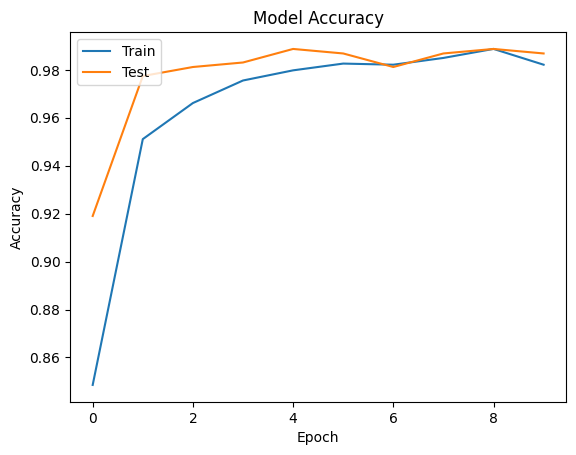

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


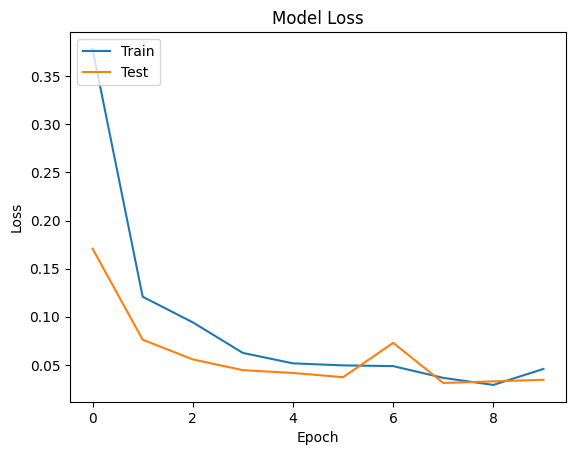

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


**With loss function="binary_crossentropy" and sigmoid in final layer**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/10
34/34 [==============================] - 13s 309ms/step - loss: 0.3875 - accuracy: 0.8838 - val_loss: 0.2991 - val_accuracy: 0.9077
Epoch 2/10
34/34 [==============================] - 10s 298ms/step - loss: 0.1591 - accuracy: 0.9233 - val_loss: 0.0887 - val_accuracy: 0.9623
Epoch 3/10
34/34 [==============================] - 10s 283ms/step - loss: 0.0926 - accuracy: 0.9699 - val_loss: 0.0681 - val_accuracy: 0.9699
Epoch 4/10
34/34 [==============================] - 11s 322ms/step - loss: 0.0613 - accuracy: 0.9788 - val_loss: 0.0544 - val_accuracy: 0.9793
Epoch 5/10
34/34 [==============================] - 11s 311ms/step - loss: 0.0392 - accuracy: 0.9840 - val_loss: 0.0365 - val_accuracy: 0.9906
Epoch 6/10
34/34 [==============================] - 9s 270ms/step - loss:

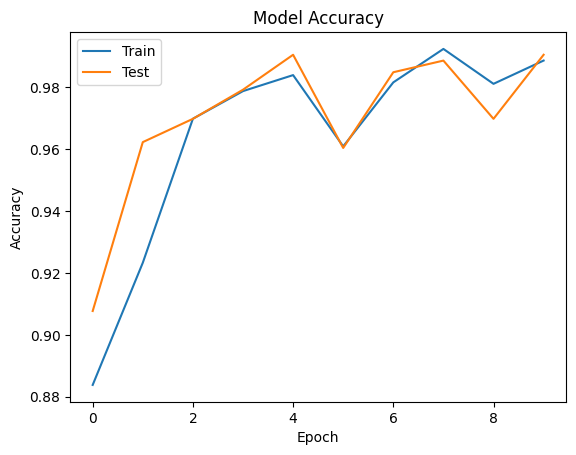

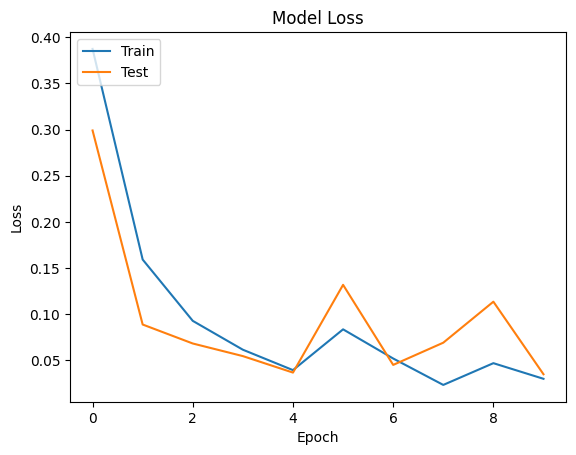

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plant_directory='/content/drive/MyDrive/Peach Crop plant Village DS'

datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])



model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()



with sgd as optimizer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/10
34/34 [==============================] - 12s 302ms/step - loss: 0.4719 - accuracy: 0.8485 - val_loss: 0.4208 - val_accuracy: 0.8644
Epoch 2/10
34/34 [==============================] - 10s 282ms/step - loss: 0.4187 - accuracy: 0.8645 - val_loss: 0.4128 - val_accuracy: 0.8644
Epoch 3/10
34/34 [==============================] - 10s 281ms/step - loss: 0.4062 - accuracy: 0.8645 - val_loss: 0.3944 - val_accuracy: 0.8644
Epoch 4/10
34/34 [==============================] - 10s 297ms/step - loss: 0.3886 - accuracy: 0.8645 - val_loss: 0.3738 - val_accuracy: 0.8644
Epoch 5/10
34/34 [==============================] - 10s 280ms/step - loss: 0.3626 - accuracy: 0.8645 - val_loss: 0.3411 - val_accuracy: 0.8644
Epoch 6/10
34/34 [==============================] - 11s 296ms/step - loss

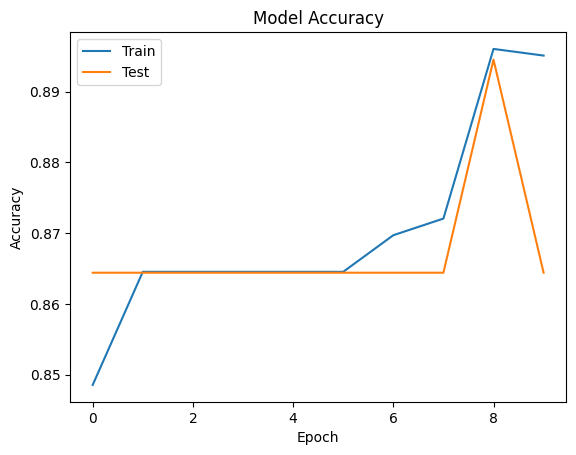

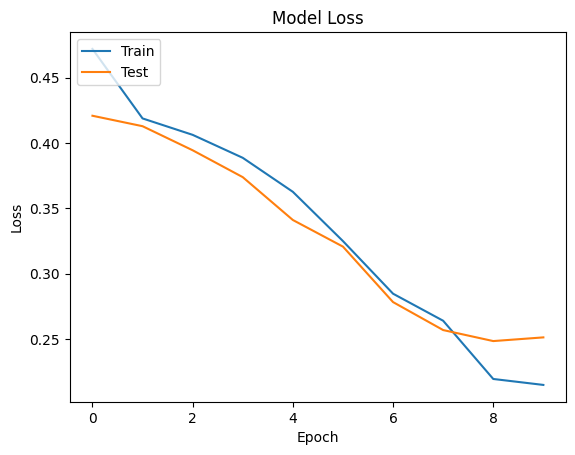

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plant_directory='/content/drive/MyDrive/Peach Crop plant Village DS'

datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')

])



model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()



Using RMSprop optimizer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/10
34/34 [==============================] - 13s 313ms/step - loss: 0.6494 - accuracy: 0.8377 - val_loss: 0.2632 - val_accuracy: 0.8644
Epoch 2/10
34/34 [==============================] - 11s 318ms/step - loss: 0.2259 - accuracy: 0.8532 - val_loss: 0.2414 - val_accuracy: 0.8644
Epoch 3/10
34/34 [==============================] - 10s 274ms/step - loss: 0.4695 - accuracy: 0.8899 - val_loss: 0.1553 - val_accuracy: 0.8644
Epoch 4/10
34/34 [==============================] - 11s 324ms/step - loss: 0.1206 - accuracy: 0.9492 - val_loss: 0.5594 - val_accuracy: 0.8644
Epoch 5/10
34/34 [==============================] - 10s 304ms/step - loss: 0.1374 - accuracy: 0.9548 - val_loss: 0.0732 - val_accuracy: 0.9718
Epoch 6/10
34/34 [==============================] - 10s 275ms/step - loss

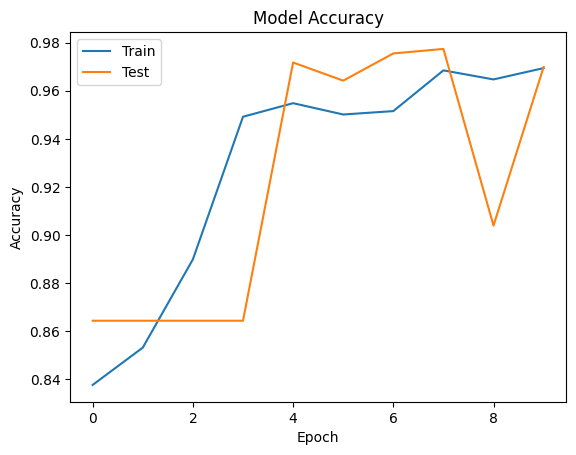

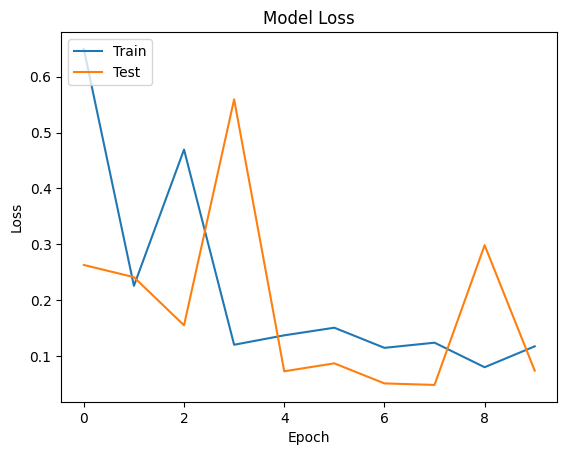

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plant_directory='/content/drive/MyDrive/Peach Crop plant Village DS'

datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')

])



model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()



USING SIGMOID INSTEAD OF RELU

Mounted at /content/drive
Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.
Epoch 1/10
34/34 [==============================] - 296s 8s/step - loss: 1.6817 - accuracy: 0.8420 - val_loss: 0.4030 - val_accuracy: 0.8644
Epoch 2/10
34/34 [==============================] - 11s 330ms/step - loss: 0.4155 - accuracy: 0.8645 - val_loss: 0.3981 - val_accuracy: 0.8644
Epoch 3/10
34/34 [==============================] - 11s 318ms/step - loss: 0.4141 - accuracy: 0.8645 - val_loss: 0.4001 - val_accuracy: 0.8644
Epoch 4/10
34/34 [==============================] - 12s 342ms/step - loss: 0.4143 - accuracy: 0.8645 - val_loss: 0.4003 - val_accuracy: 0.8644
Epoch 5/10
34/34 [==============================] - 11s 314ms/step - loss: 0.4170 - accuracy: 0.8645 - val_loss: 0.3969 - val_accuracy: 0.8644
Epoch 6/10
34/34 [==============================] - 11s 313ms/step - loss: 0.4197 - accuracy: 0.8645 - val_loss: 0.3973 - val_accuracy: 0.8644
Epoch 7/10
34/34 [=================

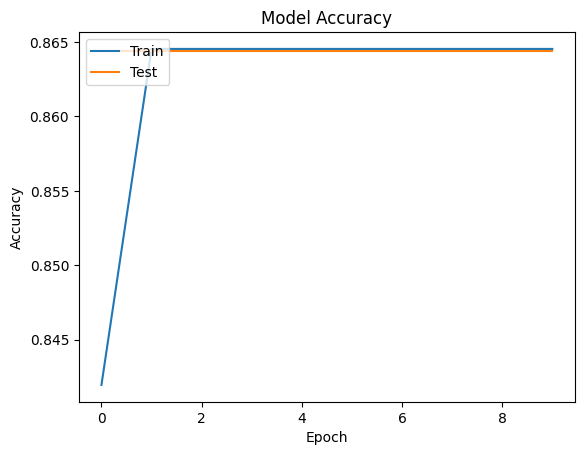

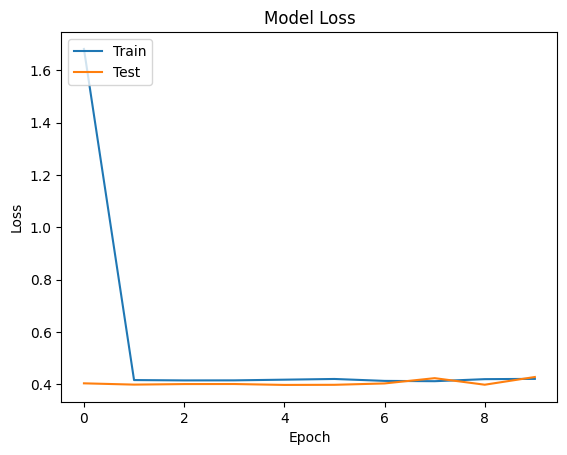

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plant_directory='/content/drive/MyDrive/Peach Crop plant Village DS'

datagen=ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary',
    subset='training'
)

test_generator=datagen.flow_from_directory(
    plant_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='sigmoid',input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000,activation='sigmoid'),
    tf.keras.layers.Dense(2,activation='softmax')

])



model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()

